In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [3]:
df_train = df.sample(frac=0.8, random_state=42)
df_valid = df.drop(df_train.index)

In [4]:
df_train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
27972,18045_2020-05-01,18045,Fountain County,Indiana,2020-05-01,1.683292,216
18285,13169_2022-05-01,13169,Jones County,Georgia,2022-05-01,1.981098,436
42532,21199_2021-06-01,21199,Pulaski County,Kentucky,2021-06-01,3.343198,1672
119017,55023_2021-12-01,55023,Crawford County,Wisconsin,2021-12-01,2.059621,266
49542,26083_2020-08-01,26083,Keweenaw County,Michigan,2020-08-01,2.456728,44


In [6]:
df_train.nunique()

row_id                   97812
cfips                     3135
county                    1871
state                       51
first_day_of_month          39
microbusiness_density    80439
active                   16836
dtype: int64

In [38]:
df_train.apply(lambda row: row['cfips'] + row['active'], axis=1)

27972     18261
18285     13605
42532     22871
119017    55289
49542     26127
          ...  
50333     27178
80192     39672
41876     21251
34311     19279
69838     69703
Length: 97812, dtype: int64

In [67]:
df_train.select_dtypes(include=np.number).apply(lambda col: col.sum(), axis=0)

cfips                    2.973239e+09
microbusiness_density    3.733896e+05
active                   6.316684e+08
dtype: float64

In [37]:
df_train['cfips']

27972     18045
18285     13169
42532     21199
119017    55023
49542     26083
          ...  
50333     26123
80192     39033
41876     21165
34311     19185
69838     34039
Name: cfips, Length: 97812, dtype: int64

In [7]:
df.describe()

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


<AxesSubplot: xlabel='cfips', ylabel='active'>

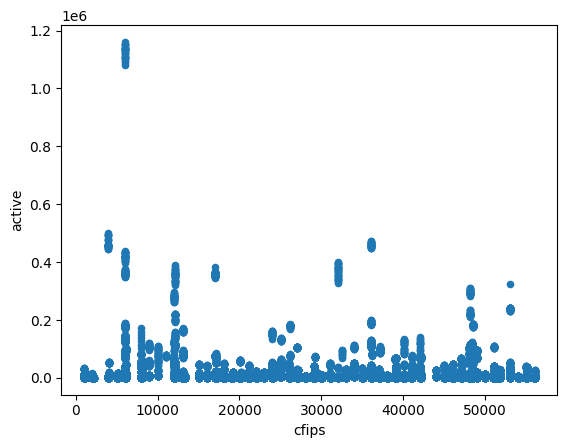

In [52]:
df_train.plot.scatter(x='cfips', y='active')

array([[<AxesSubplot: title={'center': 'cfips'}>,
        <AxesSubplot: title={'center': 'microbusiness_density'}>],
       [<AxesSubplot: title={'center': 'active'}>, <AxesSubplot: >]],
      dtype=object)

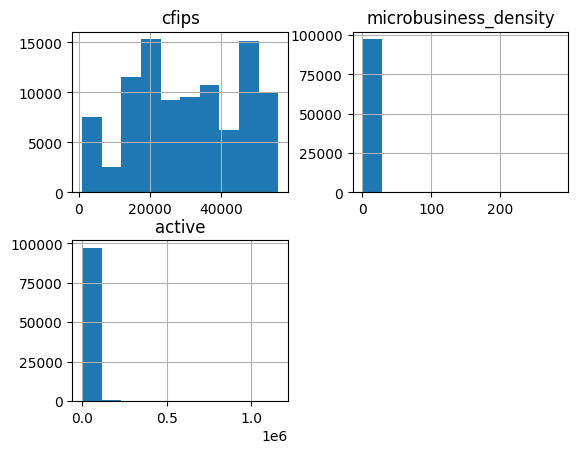

In [53]:
df_train.hist()